# Introduction to OpenStreetMap Data

This notebook is a modified version of M. Janosov's original, as presented in *[Geospatial Data Science Essentials](https://www.janosov.com/books/geo/)*


OpenStreetMap (OSM) is a comprehensive and freely available crowed-sourced geospatial data platform, offering detailed information on various geographic features such as administrative boundaries, points of interest (POIs), parks, building footprints, and road networks. Leveraging this type of data is essential for
- urban planning,
- resource allocation,
- environmental studies, and
- transportation analysis, which made OSM one of the most standard data sources of our profession. 

In this notebook, we will explore how to use Python to download and visualize different types of OpenStreetMap data. 

- We will start by querying administrative areas, such as countries, cities, and districts, and then visualize them on a map.
- Next, we will learn about downloading and visualizing POIs, including amenities like cafes and gift shops.
- We will then move on to extracting and displaying park polygons and building footprints, providing insights into urban green spaces and infrastructure.
- Finally, we will demonstrate how to download and examine road networks, which are crucial for transportation planning and urban connectivity studies.

### 1. Downloading Administrative Areas from OpenStreetMap (OSM)



Administrative areas such as countries, cities, and districts are essential for various geospatial analyses, including urban planning, resource allocation, and demographic studies. [OpenStreetMap (OSM)](http://openstreetmap.org) provides a rich source of such geospatial data, while the Python library [OSMnx](https://osmnx.readthedocs.io) provides easy-to-use methods to retrieve them.

In this section, we will demonstrate how to obtain administrative areas from OSM using `osmnx`. As an example, we will extract and visualize the country boundaries for metropolitan France, the city boundaries of Paris, and the district boundaries of 5th Arrondissement of Paris, and then combine these boundaries into a single plot. 

This process involves:
- downloading the administrative boundaries for each area using the `geocode_to_gdf` function from `osmnx`, which converts place names into GeoDataFrames.
- After plotting the individual boundaries for visual inspection, we will merge the GeoDataFrames into a single one for a combined visualization.
- Finally, we will enhance the plot with a customized legend to clearly differentiate between the administrative levels.


<Axes: >

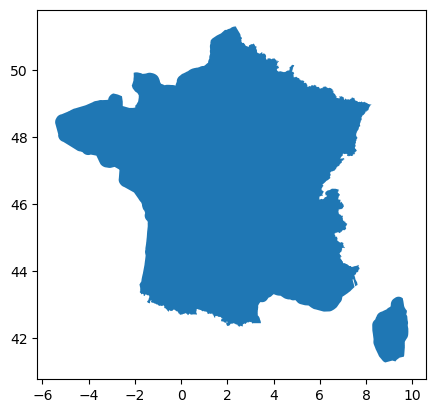

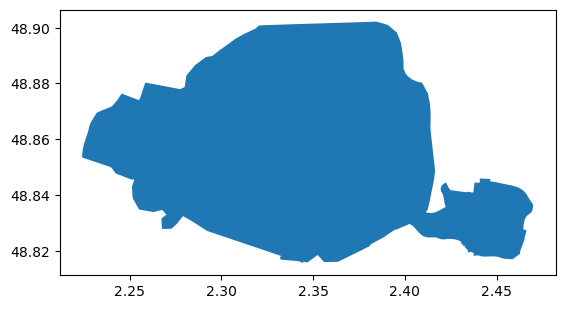

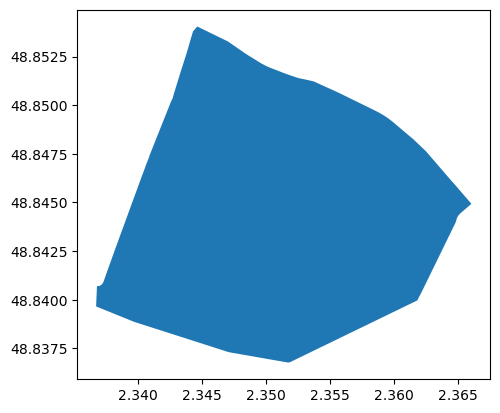

In [1]:
#Import all the libraries we use
import osmnx as ox  
import pandas as pd 
import matplotlib.pyplot as plt

# Download the administrative boundary of France (metropolitan)
admin_country = ox.geocode_to_gdf('Metropolitan France')
admin_country.plot()

# Download the administrative boundary of Paris
admin_city = ox.geocode_to_gdf('Paris')
admin_city.plot()

# Download the administrative boundary of the 5th arrondissement of Paris
admin_district = ox.geocode_to_gdf('5th Arrondissement, Paris')
admin_district.plot()

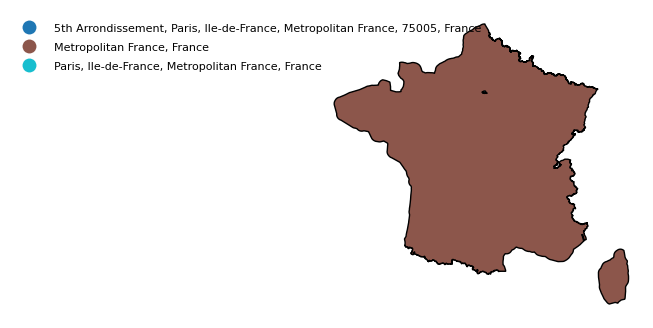

In [2]:
# Combine all the administrative boundaries into a single GeoDataFrame
admin_all = pd.concat([admin_country, admin_city, admin_district])

# Create a plot to visualize the combined administrative boundaries
f, ax = plt.subplots(1, 1, figsize=(10, 4))
admin_all.plot(column='display_name', ax=ax, edgecolor='k', legend=True)

# Customize the legend
legend = ax.get_legend()
legend.set_bbox_to_anchor((1, 1))  # Position the legend outside the plot
legend.set_frame_on(False)  # Turn off the frame
for text in legend.get_texts():
    text.set_fontsize(8)  # Change the font size
legend.set_bbox_to_anchor((0.54, 1.0))  # Place legend outside the plot

ax.axis('off')  # Turn off the axis
plt.show()  # Display the plot

Retrieving and visualizing administrative areas from OpenStreetMap is a straightforward process using OSMnx that provides a valuable base layer for various geospatial analytics tasks, such as capturing spatial relations and characterizing specific areas.

### 2. Using OSMnx to Download Points of Interest (POIs)

Points of Interest (POIs) are crucial for various geospatial analyses, urban planning tasks, and location-based services. POIs refer to entities on a map described by a pair of coordinates and may include amenities such as cafes, restaurants, and shops, which provide valuable insights into the characteristics and functionalities of an area. OpenStreetMap (OSM) is an excellent source of free POI data, and the `osmnx` library makes it easy to retrieve and visualize these points.

In this section, we will demonstrate how to use `osmnx` to download POIs within a specified administrative boundary. 

**Example**  
- Extract and visualize POIs for cafes and gift shops in the 5th Arrondissement in Paris.
- Use the `features_from_polygon` function to query POIs within the given boundary polygon and then plot the results.
- From the [OSM Wiki](https://wiki.openstreetmap.org/wiki/Map_features) site we can select the relevant tags for our use-case, such as matching `cafe` from the  `amenity` category and `gift` from the `shop` category.


In [3]:
# Import osmnx and matplotlib
import osmnx as ox  
import matplotlib.pyplot as plt

# Define the polygon for the administrative 
# boundary of the 1st district of Budapest
admin_poly = admin_district.geometry.values[0]

# Download POIs for cafes within the administrative boundary
cafes = ox.features_from_polygon(admin_poly, tags={'amenity': 'cafe'})
print("Number of cafes:", len(cafes))
print("Type of data:", type(cafes))
cafes.head()

Number of cafes: 135
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'>


geometry amenity contact:city  \
element id                                                         
node    251474112  POINT (2.34671 48.85261)    cafe        Paris   
        262934233   POINT (2.35566 48.8492)    cafe        Paris   
        315785934  POINT (2.34364 48.84152)    cafe          NaN   
        321932192   POINT (2.34837 48.8522)    cafe          NaN   
        447033603  POINT (2.34243 48.84764)    cafe          NaN   

                  contact:housenumber contact:postcode  \
element id                                               
node    251474112                   3            75005   
        262934233                   1            75005   
        315785934                 NaN              NaN   
        321932192                 NaN              NaN   
        447033603                 NaN              NaN   

                            contact:street  happy_hours                 name  \
element id                                                                     
node    251474112        Rue du Petit Pont  16:00-22:00  Le Grand Café Rouge   
        262934233  Boulevard Saint-Germain  16:00-02:00   Le Nouvel Institut   
        315785934                      NaN          NaN       Pub Gay-Lussac   
        321932192                      NaN          NaN           Café Panis   
        447033603                      NaN          NaN               Le Duc   

                       old_name                         opening_hours  ...  \
element id                                                             ...   
node    251474112  Polly Maggoo                           08:30-01:00  ...   
        262934233           NaN                     Mo-Su 07:00-02:00  ...   
        315785934           NaN                                   NaN  ...   
        321932192           NaN  Mo-Fr 07:00-01:00; Sa-Su 08:00-01:00  ...   
        447033603           NaN                                   NaN  ...   

                  kids_area:indoor kids_area:outdoor payment:mastercard  \
element id                                                                
node    251474112              NaN               NaN                NaN   
        262934233              NaN               NaN                NaN   
        315785934              NaN               NaN                NaN   
        321932192              NaN               NaN                NaN   
        447033603              NaN               NaN                NaN   

                  payment:visa start_date building building:levels  \
element id                                                           
node    251474112          NaN        NaN      NaN             NaN   
        262934233          NaN        NaN      NaN             NaN   
        315785934          NaN        NaN      NaN             NaN   
        321932192          NaN        NaN      NaN             NaN   
        447033603          NaN        NaN      NaN             NaN   

                  roof:levels roof:shape height  
element id                                       
node    251474112         NaN        NaN    NaN  
        262934233         NaN        NaN    NaN  
        315785934         NaN        NaN    NaN  
        321932192         NaN        NaN    NaN  
        447033603         NaN        NaN    NaN  

[5 rows x 99 columns]

In [4]:
# Download POIs for gift shops within the administrative boundary
gift_shops = ox.features_from_polygon(admin_poly, tags={'shop': 'gift'})
print("Number of gift shops:", len(gift_shops))
print("Type of data:", type(cafes))
gift_shops.head()

Number of gift shops: 45
Type of data: <class 'geopandas.geodataframe.GeoDataFrame'>


geometry  check_date  \
element id                                                 
node    1110738523  POINT (2.34296 48.84671)  2023-04-29   
        1125740083  POINT (2.35677 48.84188)         NaN   
        1675723913  POINT (2.34957 48.84342)         NaN   
        1702570604   POINT (2.3494 48.84353)         NaN   
        1711318536  POINT (2.34935 48.84373)  2023-10-30   

                                    name  shop  \
element id                                       
node    1110738523     Jihanne Souvenirs  gift   
        1125740083              Boutique  gift   
        1675723913  Les Trésors de Perse  gift   
        1702570604          Vert & Jaune  gift   
        1711318536         Obj'ai trouvé  gift   

                                                               source  \
element id                                                              
node    1110738523  cadastre-dgi-fr source : Direction Générale de...   
        1125740083                                                NaN   
        1675723913                                                NaN   
        1702570604                                                NaN   
        1711318536                                                NaN   

                        opening_hours payment:credit_cards  \
element id                                                   
node    1110738523                NaN                  NaN   
        1125740083  We-Mo 10:00-17:45                  yes   
        1675723913                NaN                  NaN   
        1702570604  Tu-Su 10:30-20:00                  NaN   
        1711318536                NaN                  NaN   

                   payment:debit_cards wheelchair   origin  ... addr:postcode  \
element id                                                  ...                 
node    1110738523                 NaN        NaN      NaN  ...           NaN   
        1125740083                 yes        yes      NaN  ...           NaN   
        1675723913                 NaN         no  iranian  ...           NaN   
        1702570604                 NaN        NaN      NaN  ...           NaN   
        1711318536                 NaN        NaN      NaN  ...           NaN   

                   addr:street level name:signed fixme indoor  \
element id                                                      
node    1110738523         NaN   NaN         NaN   NaN    NaN   
        1125740083         NaN   NaN         NaN   NaN    NaN   
        1675723913         NaN   NaN         NaN   NaN    NaN   
        1702570604         NaN   NaN         NaN   NaN    NaN   
        1711318536         NaN   NaN         NaN   NaN    NaN   

                   contact:instagram second_hand official_name ref:vatin  
element id                                                                
node    1110738523               NaN         NaN           NaN       NaN  
        1125740083               NaN         NaN           NaN       NaN  
        1675723913               NaN         NaN           NaN       NaN  
        1702570604               NaN         NaN           NaN       NaN  
        1711318536               NaN         NaN           NaN       NaN  

[5 rows x 29 columns]

/var/folders/kx/_1g1vzv51nq1yv81c377flsr0000gn/T/ipykernel_65428/1203291625.py:12: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend()


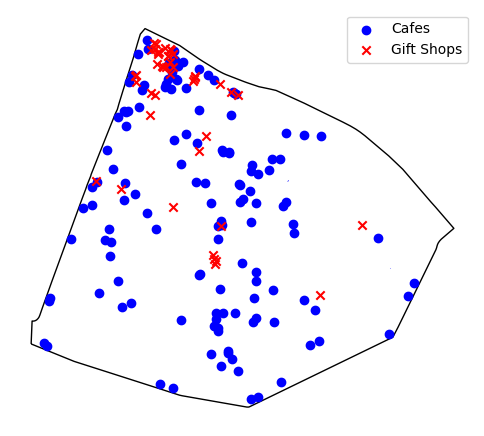

In [5]:
# Create a plot to visualize the administrative boundary and POIs
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the administrative boundary
admin_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the cafes and gift shops
cafes.plot(ax=ax, color='blue', marker='o', label='Cafes')
gift_shops.plot(ax=ax, color='red', marker='x', label='Gift Shops')

# Customize the plot
ax.legend()
ax.axis('off')
plt.show()

In this example, we briefly illustrated how to query POI data from OSM within a given target area. Namely, we were able to obtian 47 cafes and 14 gift stores with their locational information stored in GeoDataFrames, and supplement the downloading process by a quick visual as well.

### 3. Using OSMnx to Download Parks as Polygons

Parks and green spaces are vital components of urban environments, contributing to the quality of life and ecological balance. Identifying and analyzing these areas can provide valuable quantitative insights for urban planning, environmental studies, and public health assessments. OpenStreetMap (OSM) offers comprehensive data on parks, and the `osmnx` library allows us to easily retrieve and visualize these green spaces.

In this section, we will extract the park polygons in the 1st district of Budapest and visualize these areas on a map. This process involves using the `features_from_polygon` function to query park polygons within the given boundary polygon and then plotting the results.

In [6]:
# Importing all libraries we use
import osmnx as ox  
import matplotlib.pyplot as plt 

# Define the polygon of the 1st district of Budapest
admin_poly = admin_district.geometry.values[0]

# Download park polygons within the administrative boundary
parks = ox.features_from_polygon(admin_poly, tags={'leisure': 'park'})
print("Number of parks:", len(parks))
parks.head()

Number of parks: 32


geometry bicycle  \
element  id                                                                    
relation 6087528   POLYGON ((2.35421 48.8451, 2.35414 48.8451, 2....     NaN   
way      4221369   POLYGON ((2.36338 48.84507, 2.36384 48.84476, ...      no   
         4433291   POLYGON ((2.34424 48.84992, 2.34421 48.84991, ...     NaN   
         19741465  POLYGON ((2.34333 48.85121, 2.3433 48.8512, 2....     NaN   
         20105409  POLYGON ((2.34504 48.85172, 2.34502 48.85177, ...     NaN   

                              email           fax heritage heritage:operator  \
element  id                                                                    
relation 6087528                NaN           NaN      NaN               NaN   
way      4221369   valhuber@mnhn.fr  +33140795448        2               mhs   
         4433291                NaN           NaN      NaN               NaN   
         19741465               NaN           NaN      NaN               NaN   
         20105409               NaN           NaN      NaN               NaN   

                  leisure mhs:inscription_date  \
element  id                                      
relation 6087528     park                  NaN   
way      4221369     park           1993-03-24   
         4433291     park                  NaN   
         19741465    park                  NaN   
         20105409    park                  NaN   

                                                     name  \
element  id                                                 
relation 6087528   Square des Arènes de Lutèce et Capitan   
way      4221369                       Jardin des Plantes   
         4433291                       Square Samuel Paty   
         19741465                         Square de Cluny   
         20105409                    Square André Lefèvre   

                                                       opening_hours  ...  \
element  id                                                           ...   
relation 6087528                                                 NaN  ...   
way      4221369   Mar 1-Mar 30 08:00-18:30; Mar 31-Sep 31 07:30-...  ...   
         4433291                                                 NaN  ...   
         19741465                                                NaN  ...   
         20105409                                                NaN  ...   

                  building:levels operator:type access alt_name  \
element  id                                                       
relation 6087528              NaN           NaN    NaN      NaN   
way      4221369              NaN           NaN    NaN      NaN   
         4433291              NaN           NaN    NaN      NaN   
         19741465             NaN           NaN    NaN      NaN   
         20105409             NaN           NaN    NaN      NaN   

                  internet_access internet_access:fee  \
element  id                                             
relation 6087528             wlan                  no   
way      4221369              NaN                 NaN   
         4433291              NaN                 NaN   
         19741465             NaN                 NaN   
         20105409             NaN                 NaN   

                  internet_access:operator source:internet_access  \
element  id                                                         
relation 6087528           Mairie de Paris        Paris Open Data   
way      4221369                       NaN                    NaN   
         4433291                       NaN                    NaN   
         19741465                      NaN                    NaN   
         20105409                      NaN                    NaN   

                           type historic  
element  id                               
relation 6087528   multipolygon    ruins  
way      4221369            NaN      NaN  
         4433291            NaN      NaN  
         19741465           NaN      NaN  
       

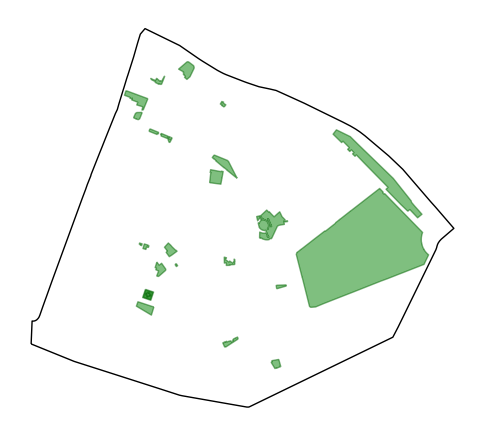

In [7]:
# Create a plot to visualize the admin boundary and park polygons
f, ax = plt.subplots(1, 1, figsize=(6, 6))

# Plot the administrative boundary
admin_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the parks
parks.plot(ax=ax, color='green', alpha=0.5, edgecolor='darkgreen')

# Customize the plot
ax.axis('off')
plt.show()

Using `osmnx` to download and visualize parks as polygons from OpenStreetMap is a powerful way to enhance geospatial analyses related to urban green spaces and, gain valuable insights into the distribution and extent of green areas and use these as inputs for advanced spatial analysis.

### 4. Using OSMnx to Download Building Footprints

Building footprints provide vital information for urban planning, infrastructure development, and environmental studies. By analyzing building footprints, we can gain quantitative insights into urban density, architectural styles, and land use patterns. OpenStreetMap (OSM) contains detailed data on building footprints, and the `osmnx` library makes it straightforward to download and visualize this information.

In this section, we will demonstrate how to use `osmnx` to download building footprints within the 1st district of Budapest and visualize these footprints on a map. This process involves using the `features_from_polygon` function to query building footprints within the given boundary polygon, and Matplotlib to plot the results.

Type of the footprints data: <class 'geopandas.geodataframe.GeoDataFrame'>
Number of buildings: 3676


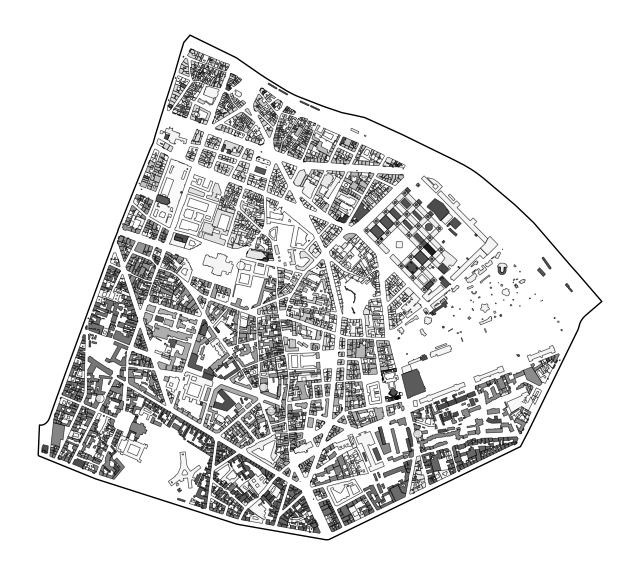

In [8]:
# Import osmnx for and matplotlib
import osmnx as ox  
import matplotlib.pyplot as plt 

# Define the polygon for the admin boundary of the 1st district of Bp.
admin_poly = admin_district.geometry.values[0]

# Download building footprints within the administrative boundary
footprints = ox.features_from_polygon(admin_poly, tags={"building": True})
print("Type of the footprints data:", type(footprints))
print("Number of buildings:", len(footprints))

# Create a plot to visualize the admin boundary and building footprints
f, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot the administrative boundary
admin_district.plot(ax=ax, color='none', edgecolor='k')

# Plot the building footprints
footprints.plot(ax=ax, 
                cmap = 'Greys', 
                edgecolor='black', 
                alpha=0.7, 
                linewidth = 0.5)

# Customize the plot
ax.axis('off')
plt.show()

Using OSMnx to download and visualize building footprints from OpenStreetMap is an effective way to enhance geospatial analyses related to urban development and land use. By extracting building footprints within a specified area, we can gain valuable insights into urban density and architectural patterns.

### 5. Using OSMnx to Download Road Networks

Road networks are fundamental components of urban infrastructure, playing a crucial role in transportation planning and navigation systems. Analyzing road networks can provide insights into traffic patterns, connectivity, and accessibility. OpenStreetMap (OSM) offers detailed data on road networks, while the `osmnx` library was specifically designed to download and visualize these networks effectively.

In this section, we will demonstrate how to use `osmnx` to download road networks within the 1st district of Budapest and examine the type and size of these graph files . This process involves using the `graph_from_polygon` function to query the road network within a given boundary polygon and then exploring the resulting graph. We also set and tested different `network_type` parameters, which allowed us to query data specific to different means of transportation, namely, driving, biking, and walking. Later, we will further explore the details of these road networks in the chapter covering spatial networks.

In [9]:
# Import osmnx for geospatial data from OpenStreetMap
import osmnx as ox 

# Define the polygon for the 1st district of Budapest
admin_poly = admin_district.geometry.values[0]

# Download the road network for all transport modes 
G_all = ox.graph_from_polygon(admin_poly, network_type='all')
print("Type of the road network graph (all modes):", type(G_all))
print("Number of nodes (all modes):", G_all.number_of_nodes())
print("Number of edges (all modes):", G_all.number_of_edges())

# Download the road network for walking within the administrative boundary
G_walk = ox.graph_from_polygon(admin_poly, network_type='walk')
print("\nType of the road network graph (walk):", type(G_walk))
print("Number of nodes (walk):", G_walk.number_of_nodes())
print("Number of edges (walk):", G_walk.number_of_edges())

# Download the road network for driving within the administrative boundary
G_drive = ox.graph_from_polygon(admin_poly, network_type='drive')
print("\nType of the road network graph (drive):", type(G_drive))
print("Number of nodes (drive):", G_drive.number_of_nodes())
print("Number of edges (drive):", G_drive.number_of_edges())

# Download the road network for biking within the administrative boundary
G_bike = ox.graph_from_polygon(admin_poly, network_type='bike')
print("\nType of the road network graph (bike):", type(G_bike))
print("Number of nodes (bike):", G_bike.number_of_nodes())
print("Number of edges (bike):", G_bike.number_of_edges())


Type of the road network graph (all modes): <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes (all modes): 3881
Number of edges (all modes): 10969

Type of the road network graph (walk): <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes (walk): 2752
Number of edges (walk): 7768

Type of the road network graph (drive): <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes (drive): 293
Number of edges (drive): 569

Type of the road network graph (bike): <class 'networkx.classes.multidigraph.MultiDiGraph'>
Number of nodes (bike): 607
Number of edges (bike): 1254


Following the logic of the previous sections, here we learned to use OSMnx to download road networks from OpenStreetMap to enhance geospatial analyses related to urban infrastructure and transportation planning. In this example, we used one of the central districts of Budapest and queried its complete road network as well as road network variants designated for walking, driving, and biking. For each variation, we printed the total number of nodes (intersections) and edges (road segments) within each road network.

### 6. Visualizing Complex Urban Areas

Urban planning and analysis require detailed visualizations to understand the spatial distribution of various elements within a city. Visualizing complex urban scenarios involves displaying multiple layers of geographic data, such as administrative boundaries, building footprints, parks, and points of interest (POIs), on a base map. While in the previous sections, we have individually downloaded data layers like these using `osmnx`, now we are now creating a comprehensive visualization combining these different dimensions.

In particular, we will visualize the 5th Arrondissement of Paris by combining multiple geographic layers, starting with the administrative boundaries of the districts, enriched by the location of local parks, all the available building footprints, and a variety of POIs essential to daily life. Additionally, we will overlay these layers on a base map using the previously introduced `contextily` for clear and informative urban visualization. Additionally, we convert all GeoDataFrames to the local CRS of France, which we also saw in the **Map Projections** chapter, EPSG23700, to better align with the local context.


In [11]:
# Import necessary libraries
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Download the administrative boundary of the 1st district of Budapest
admin_district = ox.geocode_to_gdf('5th Arrondissement, Paris')
admin_poly = admin_district.union_all()

# Download building footprints within the administrative boundary
footprints = ox.features_from_polygon(admin_poly, tags={"building": True})

# Download parks within the administrative boundary
parks = ox.features_from_polygon(admin_poly, tags={'leisure': 'park'})

# Download cafes within the administrative boundary
cafes = ox.features_from_polygon(admin_poly, tags={'amenity': 'cafe'})

# Download additional POI types within the administrative boundary
restaurants = ox.features_from_polygon(admin_poly, 
                            tags={'amenity': 'restaurant'})
schools = ox.features_from_polygon(admin_poly, 
                            tags={'amenity': 'school'})
universities = ox.features_from_polygon(admin_poly, 
                            tags={'amenity': 'university'})
hospitals = ox.features_from_polygon(admin_poly, 
                            tags={'amenity': 'hospital'})
bus_stops = ox.features_from_polygon(admin_poly, 
                            tags={'highway': 'bus_stop'})
parking_areas = ox.features_from_polygon(admin_poly, 
                            tags={'amenity': 'parking'})


print('Number of restaurants:', len(restaurants))
print('Number of schools:', len(schools))
print('Number of universities:', len(universities))
print('Number of hospitals:', len(hospitals))
print('Number of bus_stops:', len(bus_stops))
print('Number of parking_areas:', len(parking_areas))

Number of restaurants: 450
Number of schools: 41
Number of universities: 26
Number of hospitals: 5
Number of bus_stops: 80
Number of parking_areas: 26


/var/folders/kx/_1g1vzv51nq1yv81c377flsr0000gn/T/ipykernel_65428/1380831143.py:53: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper right')


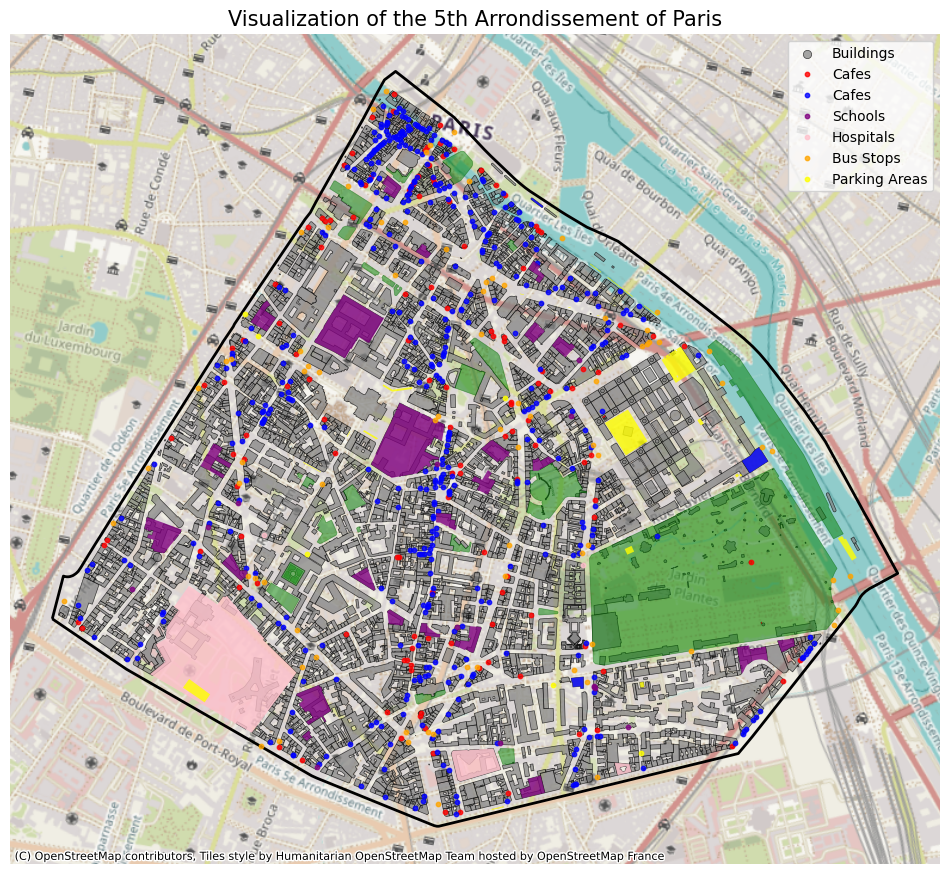

In [12]:
# Create a plot to visualize the admin boundary and various features
f, ax = plt.subplots(1, 1, figsize=(12, 12))

# Define a poi plotter function
def plot_pois(pois, color, ax, crs, label, zorder):
    pois.to_crs(crs).plot(ax=ax, 
                          color=color, 
                          markersize=10, 
                          alpha=0.8, 
                          label=label, 
                          zorder=zorder)

# Define the local CRS
crs = 23700

# Plot the administrative boundary
admin_district.to_crs(crs).plot(ax=ax, 
                                color='none', 
                                edgecolor='k', 
                                linewidth=2, 
                                label='Administrative Boundary')

# Plot the building footprints
footprints.to_crs(crs).plot(ax=ax, 
                            color='grey', 
                            alpha=0.7, 
                            edgecolor='black', 
                            linewidth=0.5, 
                            label='Buildings')

# Plot the parks
parks.to_crs(crs).plot(ax=ax, 
                       color='green', 
                       alpha=0.5, 
                       edgecolor='darkgreen', 
                       linewidth=0.5, 
                       label='Parks')

# Plot the pois
plot_pois(cafes, 'red', ax, crs, 'Cafes', zorder=5)
plot_pois(restaurants, 'blue', ax, crs, 'Cafes', zorder=6)
plot_pois(schools, 'purple', ax, crs, 'Schools', zorder=7)
plot_pois(hospitals, 'pink', ax, crs, 'Hospitals', zorder=8)
plot_pois(bus_stops, 'orange', ax, crs, 'Bus Stops', zorder=9)
plot_pois(parking_areas, 'yellow', ax, crs, 'Parking Areas', zorder=10)

# Add the basemap from contextily
ctx.add_basemap(ax,  
                crs = crs, 
                url = ctx.providers.CartoDB.DarkMatterNoLabels)

# Add legend
plt.legend(loc='upper right')

# Add title and axis labels
plt.title('Visualization of the 5th Arrondissement of Paris', fontsize=15)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
ax.axis('off')

# Show plot
plt.show()

In this section, we combined various geographic layers to visualize the 1st district of Budapest. By overlaying administrative boundaries, building footprints, parks, cafes, restaurants, schools, hospitals, bus stops, and parking areas on a CartoDB Dark Matter basemap, we created a detailed and informative visualization of this urban area. We note that while we downloaded parking areas in the batch of POIs, the resulting data shows they are often stored on OSM as polygons. This comprehensive approach allows for a better understanding and analysis of urban scenarios, aiding in effective urban planning and management.

### Summary on OpenStreetMap

In this notebook, we utilized the OSMnx library to access and visualize various types of geospatial data from OpenStreetMap. We began by retrieving administrative boundaries for Hungary, Budapest, and the 1st district of Budapest, combining these into a single visualization. We then extracted and plotted points of interest (POIs), such as cafes and gift shops within the same district. Moving forward, we downloaded park polygons and building footprints, visualizing these core urban features. Lastly, we explored how to download road networks of different types within the 1st district of Budapest. This comprehensive approach to geospatial data retrieval and visualization highlights the versatility and power of OSMnx for spatial data science

## Exercises

1. Download the map of Manila from OSM.
2. Execute all the steps of this notebook on the Manila data.